### 1.1.1 Ordernary Least Squares
min||Xw-y||2
SK中使用LinearRegression模型，fit方法，并且保存系数w在coef_成员变量中。

In [1]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
reg.coef_

array([ 0.5,  0.5])

### 1.1.2 Ridge Regression
相对于上面普通的方法，增加了一个系数的阈值。
The ridge coefficients minimize a penalized residual sum of squares,
min||Xw-y||2+a||w||2


In [7]:
from sklearn import linear_model
reg=linear_model.Ridge(alpha=0.5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [9]:
reg.intercept_

0.13636363636363638

RidgeCV实现了内置交叉验证的方法。


In [10]:
from sklearn import linear_model
reg=linear_model.RidgeCV(alphas=[0.1,1.0,10.0])
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [11]:
reg.alpha_

0.10000000000000001

In [12]:
reg.coef_

array([ 0.44186047,  0.44186047])

### 1.1.3 Lasso
min||Xw-y||^2/2n+a||w||^2

In [13]:
from sklearn import linear_model
reg=linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
reg.predict([[1,1]])

array([ 0.8])

In [15]:
reg.coef_

array([ 0.6,  0. ])

使用交叉验证
For high-dimensional datasets with many collinear regressors, LassoCV is most often preferable. However, LassoLarsCV has the advantage of exploring more relevant values of alpha parameter, and if the number of samples is very small compared to the number of features, it is often faster than LassoCV.


### 1.1.4 Multi-task Lasso
MultiTaskLasso是一个线性模型，用于预测稀疏系数矩阵，for多维回归问题。
y is a 2D array, of shape (n_samples, n_tasks)

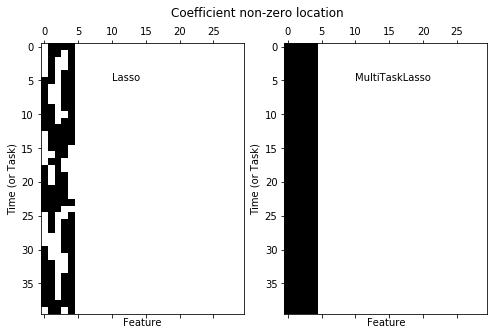

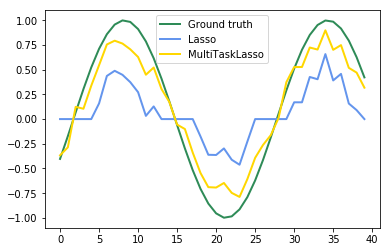

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso,Lasso

rng=np.random.RandomState(42)

n_samples,n_features,n_tasks=100,30,40
n_relevant_features=5
coef=np.zeros((n_tasks,n_features))
times=np.linspace(0,2*np.pi,n_tasks)
for k in range(n_relevant_features):
    coef[:,k]=np.sin((1.+rng.randn(1))*times+3*rng.randn(1))

X=rng.randn(n_samples,n_features)
Y=np.dot(X,coef.transpose())+rng.randn(n_samples,n_tasks)

coef_lasso_=np.array([Lasso(alpha=0.5).fit(X,y).coef_ for y in Y.transpose()])
coef_multi_task_lasso_=MultiTaskLasso(alpha=1.0).fit(X,Y).coef_

fig=plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()



### 1.1.5 Elastic Net
Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}

### 1.1.6 Multi-task Elastic Net
\underset{W}{min\,} { \frac{1}{2n_{samples}} ||X W - Y||_{Fro}^2 + \alpha \rho ||W||_{2 1} + \frac{\alpha(1-\rho)}{2} ||W||_{Fro}^2}


### 1.1.7 Least Angle Regression
LARS是用于高维数据的回归算法。与前馈stepwise回归算法相似。在每一步，找到与response最相关的预测。当存在多个预测时，它再多个预测之间进行direction equiangular运算。
相关的model是Lars和lars_path。
具体算法介绍后面再写。

### 1.1.8 LARS Lasso


Computing regularization path using the LARS ...
.

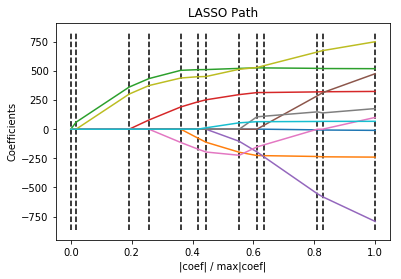

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

diabaetes=datasets.load_diabetes()
X=diabaetes.data
y=diabaetes.target

print("Computing regularization path using the LARS ...")
alpha,_,coefs=linear_model.lars_path(X,y,method='lasso',verbose=True)

xx=np.sum(np.abs(coefs.transpose()),axis=1)
xx/=xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### 1.1.9 Orthogonal Matching Pursuit (OMP)
后续查询具体算法

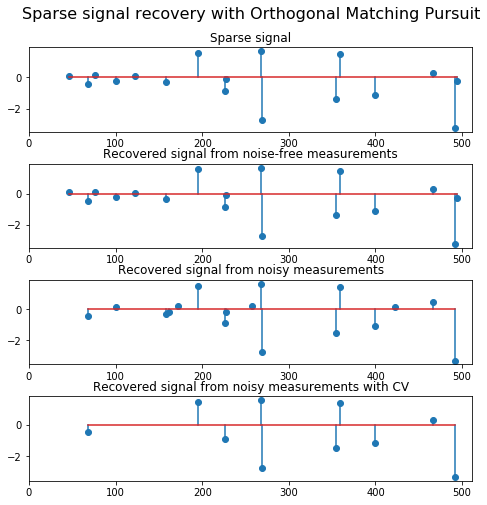

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data
###################

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction

omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction with number of non-zeros set by CV

omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

### 1.1.10 Bayesian Regression
1-Bayesian Ridge Regression


In [6]:
from sklearn import linear_model
X=[[0.,0.],[1.,1.],[2.,2.],[3.,3.]]
Y=[0.,1.,2.,3.]
reg=linear_model.BayesianRidge()
reg.fit(X,Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [7]:
reg.predict([[1,0.]])

array([ 0.50000013])

In [8]:
reg.coef_

array([ 0.49999993,  0.49999993])

2-Automatic Relevance Determination -ARD


### 1.1.11 Logistic Regression
是一个用于分类的线性模型。
实现该算法的solver包括如下几类：
liblinear，使用coordinate descent算法
lbfgs，sag和newton-cg求解器只支持L2级别的罚值计算，收敛更快。
sag求解器，使用随机均值梯度下降算法，对于large的dataset求解很快。
saga求解器一般是最好的选择。


Computing regularization path ...
This took  0:00:00.047077


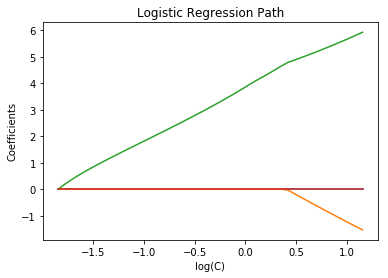

In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y!=2]
y=y[y!=2]
X-=np.mean(X,0)

cs=l1_min_c(X,y,loss='log')*np.logspace(0,3)

print("Computing regularization path ...")
start=datetime.now()
clf=linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
coefs_=[]
for c in cs:
    clf.set_params(C=c)
    clf.fit(X,y)
    coefs_.append(clf.coef_.ravel().copy())
print('This took ',datetime.now()-start)

coefs_=np.array(coefs_)
plt.plot(np.log10(cs),coefs_)
ymin,ymax=plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

### 1.1.12 Stochastic Gradient Descent-SGD 随机梯度下降
当样本的数量比较大或者特征的数目比较多时，使用此算法比较有效率。
SGDClassifier和SGDReressor两个类，提供了拟合线性模型用于分类和回归的算法，使用不同的loss方程和不同的penalty。
比如，loss="log"，拟合了一个logistic regression模型
loss="hinge"，拟合线性的SVW模型。

### 1.1.13 Perceptron 感知器
这是另外一种适用于大量样本计算的简单算法。
不需要学习率，并不是regularized，只通过mistake来更新模型。

### 1.1.14 Passive Aggressive Algorithms
这是一个适用于large-scale学习的算法家族。
同样不需要learning rate。
包含一个regularization正则化参数C。

### 1.1.15 Robustness regression: outliers and modeling errors
拟合回归模型，当出现破坏性数据时，包括outlier异常值，或者模型中的error。

### 1.1.16. Polynomial regression: extending linear models with basis functions
添加了两次特征，并看成新的特征参数。


In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X=np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
poly=PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])